<div align="center">
    <h1></h1>
    <h1>Addis Ababa University</h1>
    <h1>Addis Ababa Institute of Technology</h1>
    <h2>School of Information Technology and Engineering</h2>
    <h2>Computer Vision</h2>
    <h2>Assignment 2 - Group Assignment</h2>
    <h4>Group Members</h4>
</div>
<br><br>
<div style="max-width:600px;margin:auto" align="center">
    <table>
  <tr >
    <th style="text-align:left">Member Name</th>
    <th style="text-align:left">ID</th>
  </tr>
  <tr>
    <td style="text-align:left">BENIYAM ALEMU</td>
    <td style="text-align:left">UGR/4689/12</td>
  </tr>
  <tr>
    <td style="text-align:left">BEREKET TILAHUN</td>
    <td style="text-align:left">UGR/9703/12</td>
  </tr>
  <tr>
    <td style="text-align:left">BIREHAN ANTENEH</td>
    <td style="text-align:left"> UGR/4886/12</td>
  </tr>
  <tr>
    <td style="text-align:left">BISRAT WALLE</td>
    <td style="text-align:left">UGR/4425/12</td>
  </tr>
</table>
</div>
<br><br>
<h3 style="text-align:right">Submitted to: Fantahun B. (Phd)</h3>
<hr style="border:1px solid green">

## **AlexNet Overview**

### AlexNet, introduced by **Alex Krizhevsky**, **Ilya Sutskever**, and **Geoffrey Hinton** in 2012, was a revolutionary architecture in the field of computer vision that won the **ImageNet** Large Scale Visual Recognition Challenge (ILSVRC) in 2012. It significantly outperformed the second runner-up by reducing the top-5 error from 26% to 15.3%.

## **Key Contributions and Features of AlexNet**



### 1. **ReLU Nonlinearity:** AlexNet was the first to use ReLU (Rectified Linear Unit) as an activation function, which helped the network train faster by alleviating the vanishing gradient problem.
### 2. **Use of Dropout:** AlexNet incorporated dropout layers to combat overfitting in the fully connected layers.
### 3. **Overlapping Pooling:** This feature helped reduce the size of the network and also prevented overfitting.
### 4. **GPU Implementation:** AlexNet was designed to train on two GPUs, which was necessary due to its size and complexity.

## **Differences from Predecessors**

###  Prior models like **LeNet-5** were much simpler and smaller. AlexNet introduced a deeper and more complex architecture that could take advantage of GPU computing power, which was a major step forward from its predecessors.

## **Dataset Selection**

### For training a model like AlexNet, ImageNet is the standard dataset. However, due to resource constraints, you might consider using CIFAR-10, which is a simpler dataset with 60,000 32x32 color images in 10 classes.

## **Visualizing CIFAR-10 Dataset Samples**

100%|██████████| 170498071/170498071 [00:13<00:00, 12609604.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


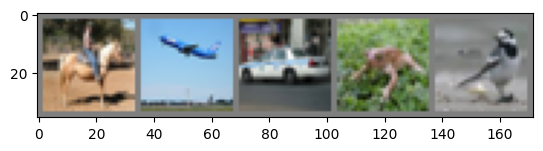

Labels:  horse plane car frog bird


In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Transformation for normalizing CIFAR-10 images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# DataLoader for iterating through the dataset
data_loader = torch.utils.data.DataLoader(cifar10_dataset, batch_size=5, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
data_iter = iter(data_loader)
images, labels = next(data_iter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('Labels: ', ' '.join(f'{classes[labels[j]]}' for j in range(5)))


## **DataLoader Setup**

In [2]:
import torch
from torchvision import datasets, transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize around the dataset mean and std
    transforms.RandomHorizontalFlip()  # Simple augmentation
])

# Load CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# Ensure the DataLoader is setup correctly
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
print(f"Batch size from DataLoader: {next(iter(trainloader))[0].size(0)}")  # Should print 64



Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Batch size from DataLoader: 64


## **AlexNet Model Implementation**

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class AlexNetCIFAR(nn.Module):
    """
    A PyTorch implementation of AlexNet for the CIFAR-10 dataset.
    AlexNet is a convolutional neural network architecture that was
    highly influential in demonstrating the power of deep networks in computer vision.
    """

    def __init__(self):
        super(AlexNetCIFAR, self).__init__()
        # Convolutional layer block
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 4096)  # Adapted for the flattened output of conv layers
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)  # CIFAR-10 has 10 classes

    def forward(self, x):
        # Apply ReLU activations to each convolution layer and add max pooling to some layers
        x = F.relu(self.conv1(x))  # Activation function added after convolution
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # First pooling layer reduces size by half

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # Second pooling layer

        x = F.relu(self.conv3(x))  # No pooling after third conv layer
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # Third pooling layer reduces size

        x = x.view(x.size(0), -1)  # Flatten the features into a vector for the fully connected layer

        # Fully connected layers with dropout to prevent overfitting
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5)  # Dropout during training helps prevent overfitting
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)  # Final layer without activation because it's handled by the loss function
        return x

# Example instantiation and optimizer setup
model = AlexNetCIFAR()
criterion = nn.CrossEntropyLoss()  # Loss function suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD optimizer with momentum


## **Model Training**

In [4]:
# Move model to GPU if available
device = torch.device("cuda:0"if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    print("epoch")
    print(epoch)
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i + 1) % 200 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {i + 1}/{len(trainloader)}, Loss: {running_loss / 200:.4f}')
            running_loss = 0.0

print('Finished Training')

epoch
0
Epoch 1/10, Step 200/782, Loss: 2.3027
Epoch 1/10, Step 400/782, Loss: 2.3024
Epoch 1/10, Step 600/782, Loss: 2.3024
epoch
1
Epoch 2/10, Step 200/782, Loss: 2.3019
Epoch 2/10, Step 400/782, Loss: 2.3016
Epoch 2/10, Step 600/782, Loss: 2.3013
epoch
2
Epoch 3/10, Step 200/782, Loss: 2.2999
Epoch 3/10, Step 400/782, Loss: 2.2982
Epoch 3/10, Step 600/782, Loss: 2.2958
epoch
3
Epoch 4/10, Step 200/782, Loss: 2.2708
Epoch 4/10, Step 400/782, Loss: 2.1608
Epoch 4/10, Step 600/782, Loss: 2.0381
epoch
4
Epoch 5/10, Step 200/782, Loss: 1.9046
Epoch 5/10, Step 400/782, Loss: 1.8719
Epoch 5/10, Step 600/782, Loss: 1.8167
epoch
5
Epoch 6/10, Step 200/782, Loss: 1.7209
Epoch 6/10, Step 400/782, Loss: 1.6989
Epoch 6/10, Step 600/782, Loss: 1.6293
epoch
6
Epoch 7/10, Step 200/782, Loss: 1.5893
Epoch 7/10, Step 400/782, Loss: 1.5942
Epoch 7/10, Step 600/782, Loss: 1.5756
epoch
7
Epoch 8/10, Step 200/782, Loss: 1.5385
Epoch 8/10, Step 400/782, Loss: 1.5250
Epoch 8/10, Step 600/782, Loss: 1.4904


## **Define the Model Evaluation Function**

In [5]:
def evaluate_model(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Inference without gradient calculation
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


## **Load and Prepare the Test Data**

In [6]:
# Define transformations for the test set
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize around the dataset mean and std

])

# Load the CIFAR-10 test dataset
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified


## **Evaluate the Model**

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Evaluate the model
evaluate_model(model, test_loader, device)


Accuracy of the model on the test images: 48.19%


### Achieving 48.19% accuracy with an AlexNet model on CIFAR-10 is a decent point, especially considering the complexity and variability of this dataset.